In [28]:
!pip install networkx gensim node2vec -q
!pip install --upgrade --force-reinstall networkx gensim node2vec scipy numpy -q
!pip install networkx gensim node2vec pyvis matplotlib scikit-learn -q

In [20]:
import networkx as nx
import numpy as np
from node2vec import Node2Vec
from gensim.models import Word2Vec
from pyvis.network import Network
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

'\n# Step 1: Create a simple graph\nG = nx.Graph()\nedges = [\n    (1, 2), (1, 3), (2, 4), (3, 4),\n    (4, 5), (5, 6), (5, 7), (6, 7)\n]\nG.add_edges_from(edges)\n\n# Update node names to reflect individuals and companies\nnode_names = {1: \'Individual A\', 2: \'Company X\', 3: \'Individual B\', 4: \'Company Y\', 5: \'Individual C\', 6: \'Company Z\', 7: \'Individual D\'}\nG = nx.relabel_nodes(G, node_names)\n\n# Step 2: Generate node2vec walks\nnode2vec = Node2Vec(G, dimensions=64, walk_length=10, num_walks=100, workers=1)\nwalks = [list(map(str, walk)) for walk in node2vec.walks]\n\n# Step 3: Train Word2Vec\nmodel = Word2Vec(sentences=walks, vector_size=64, window=5, min_count=1, sg=1, workers=1)\n\n# Step 4: Visualization with pyvis (graph layout)\nnet = Network(notebook=True)\nfor node in G.nodes:\n    color = \'red\' if node == \'Individual Y\' else \'blue\'\n    embedding = model.wv[str(node)]\n    tooltip = f"Embedding: {embedding}"\n    net.add_node(str(node), label=str(node),

In [19]:
# 1: Create a network with all 25 nodes and their edges
G = nx.Graph()

# Define all nodes
nodes = [
    'Individual A', 'Company X', 'Individual B', 'Company Y', 'Individual C', 'Company Z', 'Individual D',
    'Company A', 'Company B', 'Company C', 'Company D', 'Individual E', 'Individual F', 'Individual G', 'Individual H',
    'Company E', 'Company F', 'Company G', 'Company H', 'Individual I', 'Individual J', 'Individual K', 'Individual L', 'Individual M', 'Individual N'
]
G.add_nodes_from(nodes)

# Define all edges
edges = [
    ('Individual A', 'Company X'), ('Individual A', 'Individual B'),
    ('Company X', 'Company Y'), ('Individual B', 'Company Y'),
    ('Company Y', 'Individual C'), ('Individual C', 'Company Z'),
    ('Individual C', 'Individual D'), ('Company Z', 'Individual D'),
    ('Company A', 'Individual A'), ('Company B', 'Individual B'),
    ('Company C', 'Company Z'), ('Company D', 'Individual D'),
    ('Individual E', 'Individual A'), ('Individual F', 'Individual B'),
    ('Individual G', 'Company Z'), ('Individual H', 'Individual D'),
    ('Company E', 'Company A'), ('Company F', 'Company B'),
    ('Company G', 'Company C'), ('Company H', 'Company D'),
    ('Individual I', 'Individual E'), ('Individual J', 'Individual F'),
    ('Individual K', 'Individual G'), ('Individual L', 'Individual H'),
    ('Individual M', 'Individual I'), ('Individual N', 'Individual J'),
    ('Company E', 'Company F'), ('Company G', 'Company H'),
    ('Individual I', 'Individual J'), ('Individual K', 'Individual L')
]
G.add_edges_from(edges)

# 2: Generate node2vec walks
node2vec = Node2Vec(G, dimensions=64, walk_length=10, num_walks=100, workers=1)
walks = [list(map(str, walk)) for walk in node2vec.walks]

# 3: Train Word2Vec
model = Word2Vec(sentences=walks, vector_size=64, window=5, min_count=1, sg=1, workers=1)

# 4: Visualization with pyvis (graph layout)
net = Network(notebook=True)
for node in G.nodes:
    if node in ['Individual A', 'Company X', 'Individual B', 'Company Y', 'Individual C', 'Company Z', 'Individual D']:
        color = 'blue'
        embedding = model.wv[str(node)]
        tooltip = f"Embedding: {embedding}"
    else:
        color = 'grey'
        tooltip = "No embedding"
    net.add_node(str(node), label=str(node), color=color, title=tooltip)
for edge in G.edges:
    net.add_edge(str(edge[0]), str(edge[1]))
net.show("graph_step_1.html")

Generating walks (CPU: 1): 100%|██████████| 100/100 [00:00<00:00, 1087.02it/s]

graph_step_1.html


In [26]:
G2 = nx.Graph()
edges_2 = [
    (1, 2), (1, 3), (2, 4), (3, 4),
    (4, 5), (5, 6), (5, 7), (6, 7)
]
G2.add_edges_from(edges_2)

# Update node names to reflect individuals and companies
node_names_2 = {1: 'Individual A', 2: 'Company X', 3: 'Individual B', 4: 'Company Y', 5: 'Individual C', 6: 'Company Z', 7: 'Individual D'}
G2 = nx.relabel_nodes(G2, node_names_2)

# 2: Generate node2vec walks
node2vec = Node2Vec(G2, dimensions=64, walk_length=10, num_walks=100, workers=1)
walks = [list(map(str, walk)) for walk in node2vec.walks]

# 3: Train Word2Vec
model = Word2Vec(sentences=walks, vector_size=64, window=5, min_count=1, sg=1, workers=1)


# 4: Visualization with pyvis (graph layout)
net = Network(notebook=True)
scores = {
    'Individual A': '14%', 'Company X': '31%', 'Individual B': '26%', 'Company Y': '83%',
    'Individual C': '54%', 'Company Z': '23%', 'Individual D': '17%'
}
for node in G2.nodes:
    color = 'red' if node == 'Company Y' else 'blue'
    embedding = model.wv[str(node)]
    score = scores.get(node, 'N/A')
    tooltip = f"Score: {score}\n\nEmbedding: {embedding}"
    label = f"{node}\n{score}" if node == 'Company Y' else node
    net.add_node(str(node), label=label, color=color, title=tooltip, font={'color': 'red' if node == 'Company Y' else 'black'})
for edge in G2.edges:
    net.add_edge(str(edge[0]), str(edge[1]))
        
    
net.show("graph_step_2.html")





Generating walks (CPU: 1): 100%|██████████| 100/100 [00:00<00:00, 5131.40it/s]

graph_step_2.html


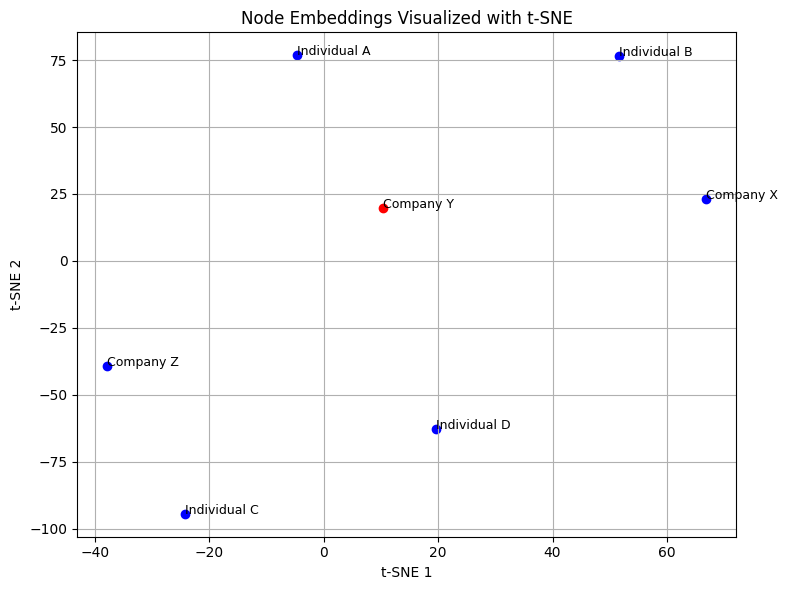

In [27]:
# 5: t-SNE + Matplotlib to visualize embeddings
# Collect embeddings
labels = list(model.wv.index_to_key)
vectors = [model.wv[label] for label in labels]

vectors_array = np.array(vectors)

# Reduce dimensionality
tsne = TSNE(n_components=2, random_state=42, perplexity=5)
reduced_vecs = tsne.fit_transform(vectors_array)

plt.figure(figsize=(8, 6))
for i, label in enumerate(labels):
    x, y = reduced_vecs[i]
    color = 'red' if label == 'Company Y' else 'blue'
    plt.scatter(x, y, color=color)
    plt.text(x + 0.01, y + 0.01, label, fontsize=9)
plt.title("Node Embeddings Visualized with t-SNE")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.grid(True)
plt.tight_layout()
plt.show()


In [4]:
# Loading Step 1, 2 and 4 of graph modeling as iframe for reference 

from IPython.display import IFrame, display

display(IFrame('graph_step_1.html', width=800, height=600))
display(IFrame('graph_step_2.html', width=800, height=600))